In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

credit_df = pd.read_csv('Credit_card.csv')

In [82]:
credit_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


# 1: Cleaning dataset (I used a lot of mapping)

In [83]:
def standardize():
    credit_df['GENDER'] = credit_df['GENDER'].map({'M':0, 'F':1})
    credit_df['Car_Owner'] = credit_df['Car_Owner'].map({'Y':1, 'N':0})
    credit_df['Propert_Owner'] = credit_df['Propert_Owner'].map({'Y':1, 'N':0})
    credit_df['Type_Income'] = credit_df['Type_Income'].map({'Working':1, 'Commercial associate':2,
                                                         'Pensioner':3, 'State servant':4})
    credit_df['EDUCATION'] = credit_df['EDUCATION'].map({'Academic degree':1,'Incomplete higher':2,
                                                     'Lower secondary':3,'Secondary / secondary special':4,
                                                     'Higher education':5})
    credit_df['Marital_status'] = credit_df['Marital_status'].map({'Married':1, 'Single / not married':2,
                                                               'Civil marriage':3,'Separated':4,
                                                               'Widow':5})
    credit_df['Housing_type'] = credit_df['Housing_type'].map({'House / apartment':1, 'With parents':2,
                                                           'Rented apartment':3,'Municipal apartment':4,
                                                           'Co-op apartment':5,'Office apartment':6})
    credit_df['Type_Occupation'] = credit_df['Type_Occupation'].map({'Core staff':1,'Cooking staff':2,
                                                                'Laborers':3,'Sales staff':4,'Accountants':5,
                                                                 'High skill tech staff':6,'Managers':7,
                                                                'Cleaning staff':8,'Drivers':9,
                                                                'Low-skill laborers':10,'IT staff':11,
                                                                'Waiters/barmen staff':12,'Security staff':13,
                                                                'Medicine staff':14,'Private service staff':15,
                                                                'HR staff':16,'Secretaries':17,'Realty agents':18})
    credit_df['Birthday_count'] = credit_df['Birthday_count'].div(-365)
    credit_df['Birthday_count'] = credit_df['Birthday_count'].round(2)

    credit_df['Employed_days'] = credit_df['Employed_days'].replace(365243,0)
    credit_df['Employed_days'] = credit_df['Employed_days']*(-1)

    credit_df['Annual_income'] = credit_df['Annual_income'].fillna(credit_df['Annual_income'].median())
    # 0 means unemployed
    # credit_df['Birthday_count'].fillna(0)

In [84]:
# def one_hot_encoding():
#     credit_df = pd.read_csv('Credit_card.csv')
#     credit_df_gender = pd.get_dummies(credit_df['GENDER'])
#     # credit_df = pd.get_dummies(credit_df, columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
#                                          # 'Marital_status', 'Housing_type', 'Type_Occupation'])
#     credit_df['Birthday_count'] = credit_df['Birthday_count'].div(-365)
#     credit_df['Birthday_count'] = credit_df['Birthday_count'].round(2)

#     credit_df['Employed_days'] = credit_df['Employed_days'].replace(365243,0)
#     credit_df['Employed_days'] = credit_df['Employed_days']*(-1)

#     # credit_df['Annual_income'] = credit_df['Annual_income'].fillna(credit_df['Annual_income'].median())
#     print(credit_df)

In [85]:
# credit_df = pd.read_csv('Credit_card.csv')
# credit_df_gender = pd.get_dummies(credit_df['GENDER'])
# # credit_df = pd.get_dummies(credit_df, columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
#                                                 # 'Marital_status', 'Housing_type', 'Type_Occupation'])
# credit_df['Birthday_count'] = credit_df['Birthday_count'].div(-365)
# credit_df['Birthday_count'] = credit_df['Birthday_count'].round(2)

# credit_df['Employed_days'] = credit_df['Employed_days'].replace(365243,0)
# credit_df['Employed_days'] = credit_df['Employed_days']*(-1)

# credit_df['Annual_income'] = credit_df['Annual_income'].fillna(credit_df['Annual_income'].median())
# print(credit_df_gender.columns)

In [86]:
standardize()

# 2. Linear Regression

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# credit_df_linreg = credit_df[['EDUCATION','Annual_income']]
# X = np.array(credit_df['Annual_income']).reshape(-1,1)
# y = np.array(credit_df['EDUCATION']).reshape(-1,1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
# regression_model = LinearRegression()
# regression_model.fit(X_train, y_train)
# y_pred = regression_model.predict(X_test)
# accuracy_score = regression_model.score(X_test, y_test)
# print(accuracy_score)

In [114]:
def linear_regression(X_column: str, y_column: str) -> str:
    X = np.array(X_column).reshape(-1,1)
    y = np.array(y_column).reshape(-1,1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    y_pred = regression_model.predict(X_test)
    accuracy_score = regression_model.score(X_test, y_test)
    print('Accuracy Score:', accuracy_score)
    plt.scatter(X_test, y_test, color = 'r')
    plt.plot(X_test, y_pred, color = 'b')

Accuracy Score: 0.028338466057532874


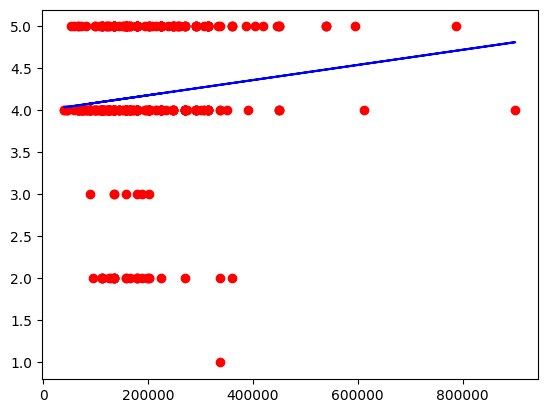

In [115]:
linear_regression(credit_df['Annual_income'], credit_df['EDUCATION'])

This did not perform well at all. You would think that annual income could rely on the type of education that a person has, but this dataset had a just under 3% accuracy score. This isn't the best approach for this dataset because it's so low.

I'm also getting low results for other items too. This isn't a good approach for this dataset. That's because the whole goal is to predict if people are being approved or denied for a credit card. That uses the approval ('label') column, which we could easily use logistic regression on.

# 3. KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# boxplot = credit_df.boxplot(column = ['Birthday_count'], return_type='axes')

In [91]:
# credit_card_approval_df = np.where((credit_df['Birthday_count'] > 18) & (credit_df['Employed_days'] > 180), 1, 0)
# credit_card_approval_df = pd.DataFrame(credit_card_approval_df)
# credit_card_approval_df['Approval'] = credit_card_approval_df[0]
# credit_df = pd.concat([credit_df, credit_card_approval_df], axis=1)


# Originally, I had missed the credit_card_labels csv and had made my own column with general guidelines
# I realized this after I did the following KNN and Linear Regression models, so I fixed it later

credit_card_labels = pd.read_csv('credit_card_label.csv')
credit_df = pd.merge(credit_df, credit_card_labels, on="Ind_ID")

In [92]:
# Fill NaN values
credit_df.fillna(0, inplace=True)

In [93]:
# credit_df.columns = credit_df.columns.astype(str)

# X = credit_df.drop('label', axis=1)
# y = credit_df['label']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)
# knn = KNeighborsClassifier(n_neighbors=4)
# knn.fit(X_train, y_train)
# print(knn.score(X_test, y_test))

In [94]:
# def knn_setup(target_df: str, target_column: str):
#     credit_df.columns = credit_df.columns.astype(str)
#     X = target_df.drop(target_column, axis=1)
#     y = target_df[target_column]

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

#     sc = StandardScaler()
#     X_train = sc.fit_transform(X_train)
#     X_test = sc.fit_transform(X_test)
    

In [95]:
# def knn_optimal_val(knn_max_val: int):
#     from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#     knn_list = []
#     knn_val = 1
#     while knn_val <= knn_max_val:
#         knn = KNeighborsClassifier(n_neighbors=knn_val)
#         knn.fit(X_train, y_train)
#         knn_list.append(knn.score(X_test, y_test))
#         knn_val = knn_val + 1
#     # print(knn_list)
#     knn_max = (max(knn_list))
#     knn_val_in_list = (knn_list.index(knn_max))
#     print(knn_max)
#     print(knn_val_in_list + 1)
    
    

In [116]:
def knn_test_all(target_df: str, target_column: str, knn_max_val: int) -> str:
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    credit_df.columns = credit_df.columns.astype(str)
    X = target_df.drop(target_column, axis=1)
    y = target_df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)

    # looks for max
    knn_list = []
    knn_val = 1
    while knn_val <= knn_max_val:
        knn = KNeighborsClassifier(n_neighbors=knn_val)
        knn.fit(X_train, y_train)
        knn_list.append(knn.score(X_test, y_test))
        knn_val = knn_val + 1
    # print(knn_list)
    knn_max = (max(knn_list))
    knn_val_in_list = (knn_list.index(knn_max))
    print('Highest Score:', knn_max)
    print('KNN Value Used:', knn_val_in_list + 1)
    y_pred = knn.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

def precision_and_recall(calc_type: str, tp: int, tn: int,
                                fp: int, fn: int) -> float:
    if calc_type == "precision":
        value = tp / (tp + fp)
        return value
    elif calc_type == "recall":
        value = tp / (tp + fn)
        return value
    elif calc_type == "accuracy":
        value = (tp + tn) / (tp+tn+fp+fn)
        return value

In [97]:
# knn_setup(credit_df, 'label')

Highest Score: 0.8924731182795699
KNN Value Used: 2


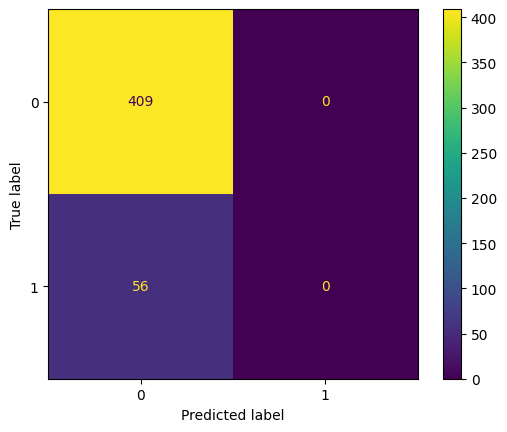

In [117]:
knn_test_all(credit_df, 'label', 30)
# This function puts all of the knn values into a list from 1 to the max you put in
# It then finds the max of the list, and what knn value that was, and prints it
# This shows the maximum knn value for this df is 2.

In [110]:
precision_and_recall("precision", 409, 0, 0, 56)

1.0

In [109]:
precision_and_recall("recall", 409, 0, 0, 56)

0.8795698924731182

In [101]:
precision_and_recall("accuracy", 409, 0, 0, 56)

0.8795698924731182

The model performs very well, with a score just below 90.

# 4. Logistical Regression

In [118]:
def logistical_regression(linreg_df: str, linreg_column: str, mosaic_y_or_n:str, matrix_y_or_n:str) -> str:
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix
    from statsmodels.graphics.mosaicplot import mosaic
    from sklearn.metrics import ConfusionMatrixDisplay
    X = linreg_df.drop(linreg_column, axis=1)
    y = linreg_df[linreg_column]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
    random_state=13, stratify=y)
    
    sc = StandardScaler()
    
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    
    regression = LogisticRegression(random_state=13, class_weight='balanced').fit(X_train, y_train)
    y_predicted = regression.predict(X_test)
    print('Regression Score:', regression.score(X_test, y_test))
    if mosaic_y_or_n == 'y':
        conf_matrix = confusion_matrix(y_test, y_predicted)
        mosaic(conf_matrix)
    if matrix_y_or_n == 'y':
        ConfusionMatrixDisplay.from_estimator(regression, X_test, y_test)



Regression Score: 0.6161290322580645


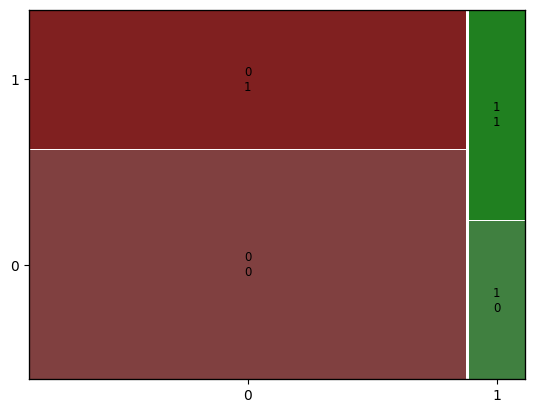

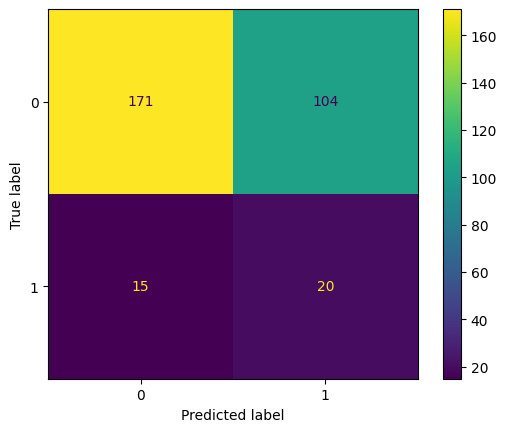

In [119]:
# mosaic_and_matrix(credit_df, 'label', 'y','y')
logistical_regression(credit_df, 'label', 'y', 'y')


In [111]:
precision_and_recall("precision", 171, 20, 104, 15)

0.6218181818181818

In [112]:
precision_and_recall("recall", 171, 20, 104, 15)

0.9193548387096774

In [113]:
precision_and_recall("accuracy", 171, 20, 104, 15)

0.6161290322580645

# 5. Normalization

In [104]:
credit_df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [105]:
# credit_df[['CHILDREN', 'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
#            'Housing_type', 'Birthday_count', 'Employed_days', 'Phone', 'Type_Occupation', 'Family_Members']]

# I was looking how to normalize and found this
# it subtracts the mean from the df and then divides by the standard deviation
from scipy.stats import zscore
credit_df_zscore = credit_df.apply(zscore)
credit_df_zscore

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,-1.680730,-1.300836,1.216869,0.729845,-0.531645,-0.098116,1.221405,1.241267,-0.574148,-0.298377,0.642359,-0.922777,NaN,-0.512487,-0.669390,-0.319029,-0.893765,-0.170453,2.801020
1,-1.658742,0.768737,1.216869,-1.370155,-0.531645,1.102824,0.196616,1.241267,-0.574148,-0.298377,-0.489706,-0.678865,NaN,1.951270,1.493899,-0.319029,-0.893765,-0.170453,2.801020
2,-1.658694,0.768737,1.216869,-1.370155,-0.531645,1.102824,0.196616,1.241267,-0.574148,-0.298377,-3.431966,-0.678865,NaN,1.951270,1.493899,-0.319029,-0.893765,-0.170453,2.801020
3,-1.658622,0.768737,1.216869,-1.370155,-0.531645,-0.218210,0.196616,1.241267,-0.574148,-0.298377,-0.489706,-0.678865,NaN,1.951270,1.493899,-0.319029,-0.893765,-0.170453,2.801020
4,-1.658550,0.768737,1.216869,-1.370155,-0.531645,1.102824,0.196616,1.241267,-0.574148,-0.298377,-0.489706,-0.678865,NaN,1.951270,1.493899,-0.319029,-0.893765,-0.170453,2.801020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,-1.205525,0.768737,-0.821781,0.729845,-0.531645,-0.218210,0.196616,1.241267,-0.574148,-0.298377,-0.836693,-0.014559,NaN,-0.512487,-0.669390,-0.319029,0.829823,-0.170453,-0.357013
1544,-1.325178,0.768737,-0.821781,-1.370155,-0.531645,0.302197,0.196616,-3.244681,0.299777,-0.298377,-1.212200,-0.419553,NaN,-0.512487,-0.669390,-0.319029,0.337369,-1.225901,-0.357013
1545,0.888921,-1.300836,1.216869,0.729845,2.044213,-0.098116,-0.828172,1.241267,-0.574148,-0.298377,-0.572888,0.108229,NaN,-0.512487,-0.669390,-0.319029,0.829823,1.940442,-0.357013
1546,0.942321,-1.300836,1.216869,-1.370155,-0.531645,0.702511,-0.828172,-0.254049,1.173702,-0.298377,-0.112615,-0.654307,NaN,1.951270,1.493899,-0.319029,1.322276,-0.170453,-0.357013


Accuracy Score: 0.028338466057532652


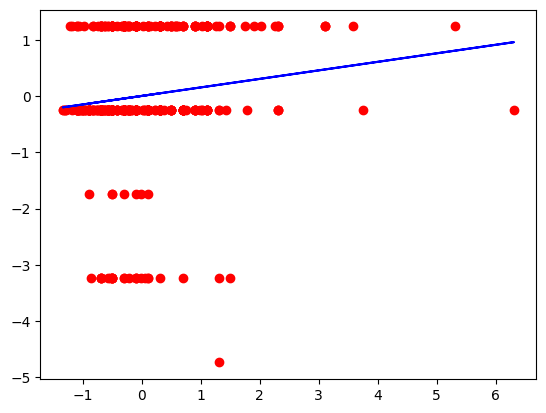

In [106]:
# Linear Regression
linear_regression(credit_df_zscore['Annual_income'],credit_df_zscore['EDUCATION'])

Highest Score: 0.8924731182795699
KNN Value Used: 2


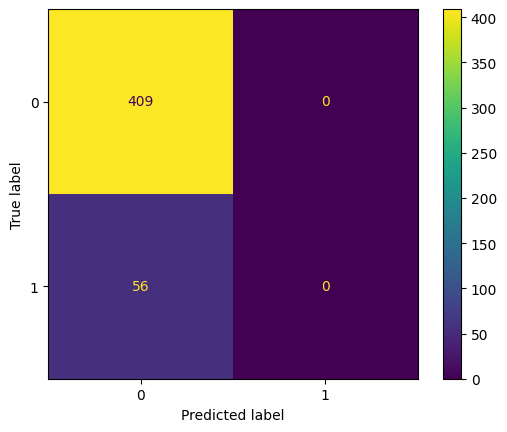

In [107]:
# KNN

# here I'm converting label back to 0 and 1 so I can do knn and logistic regression with it
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
credit_df_zscore['label'] = label_encoder.fit_transform(credit_df_zscore['label'])
credit_df_zscore['Mobile_phone'] = label_encoder.fit_transform(credit_df_zscore['Mobile_phone'])
credit_df_zscore

knn_test_all(credit_df_zscore, 'label', 30)

Regression Score: 0.6161290322580645


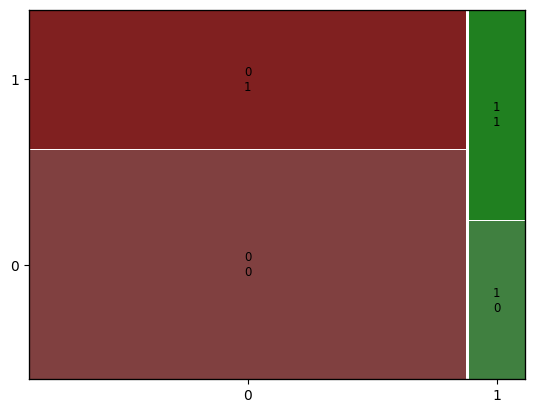

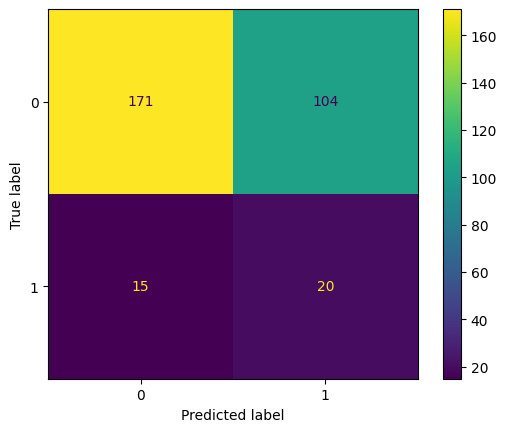

In [108]:
# Logistic Regression

logistical_regression(credit_df_zscore, 'label', 'y', 'y')

The results didn't change it all after performing normalization on the dataset.

The best measure in this dataframe is knn, with a score of 89. I do feel as if the results for all of these are skewed, though, because of how many more approvals there are than rejects in the labels column. In addition, KNN has a precision score, which is necessary when working with this df. Accidentally disapproving of people who should be approved is bad and can cause problems, but I feel as if accidentally approving those who shouldn't be approved is more costly. This can cost money and reputation.